In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, stride=1)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(22*22*64, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
# Some other functions:
def Accuracy(dataloader,model):     
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    for data in dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return 100 * correct / total

class CNNModel:
  def __init__(self, batch_size,epochs,lr):
    self.batchSize = batch_size
    self.epochs = epochs
    self.learningRate = lr
    self.classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    self.trainloader = None
    self.valLoader = None
    self.AccTrain = []
    self.AccVal = []
    self.Epoch = []
    self.Model = None

  def loadData(self):
    # Data transformations 
    normal_transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    flip_transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        #,transforms.RandomHorizontalFlip(), transforms.RandomCrop(size=32)
        ])
    # Data Loading 

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=flip_transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=self.batchSize,
                                              shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=normal_transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=self.batchSize,
                                            shuffle=False, num_workers=2)
    self.trainloader = trainloader
    self.valLoader = testloader
    print("Data Loaded")

  def train(self):
    batches = 50000/self.batchSize
    Train_Acc=[]
    Test_Acc=[]
    Epochs=[]
    model = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=self.learningRate)
    for epoch in range(self.epochs):  
      running_loss = 0.0
      for i, data in enumerate(self.trainloader, 0):
          inputs, labels = data
          images = inputs.to(device)
          labels = labels.to(device)
          # zero the parameter gradients
          optimizer.zero_grad()
          # Forward Pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          # Backpropagation and optimizatuon

          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          # if i % 4000 == 3999:    # print every 2000 mini-batches
      print(f' Epoch: {epoch + 1} loss: {running_loss / batches:.3f}')
      running_loss = 0.0
      # with torch.no_grad():
      #   testAcc = Accuracy(self.valLoader,model)
      #   trainAcc = Accuracy(self.trainloader, model)
      #   Train_Acc.append(trainAcc)
      #   Test_Acc.append(testAcc)
      #   Epochs.append(epoch+1)
      #   print(f'Accuracy of the network on the 10000 test images: {testAcc} %')
      #   print(f'Accuracy of the network on the train images: {trainAcc} %')
    self.Model = model
    self.AccVal = Test_Acc
    self.AccTrain = Train_Acc
    self.Epoch = Epochs




In [ ]:
def drawAcc(TrainAcc,TestAcc,Epoch):
  x = Epoch
  y1= TrainAcc
  y2 = TestAcc

  plt.plot(x,y1,color='blue',label = 'Training Accuracy') # for training data 
  plt.plot(x,y2,color='red',label= 'Validation Accuracy') # for test data 
  plt.legend()
  plt.show()

---------( Batch Size = 4 )----------


100%|██████████| 170498071/170498071 [00:32<00:00, 5316538.54it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Data Loaded
 Epoch: 1 loss: 1.816
 Epoch: 2 loss: 1.405
 Epoch: 3 loss: 1.210
 Epoch: 4 loss: 1.069
 Epoch: 5 loss: 0.963
 Epoch: 6 loss: 0.878
 Epoch: 7 loss: 0.805
 Epoch: 8 loss: 0.742
 Epoch: 9 loss: 0.678
 Epoch: 10 loss: 0.617
 Epoch: 11 loss: 0.559
 Epoch: 12 loss: 0.500
---------( Batch Size = 8 )----------
Files already downloaded and verified
Files already downloaded and verified
Data Loaded
 Epoch: 1 loss: 1.974
 Epoch: 2 loss: 1.519
 Epoch: 3 loss: 1.368
 Epoch: 4 loss: 1.278
 Epoch: 5 loss: 1.195
 Epoch: 6 loss: 1.113
 Epoch: 7 loss: 1.040
 Epoch: 8 loss: 0.974
 Epoch: 9 loss: 0.914
 Epoch: 10 loss: 0.858
 Epoch: 11 loss: 0.806
 Epoch: 12 loss: 0.760
---------( Batch Size = 16 )----------
Files already downloaded and verified
Files already downloaded and verified
Data Loaded
 Epoch: 1 loss: 2.062
 Epoch: 2 loss: 1.691
 Epoch: 3 loss: 1.524
 Epoch: 4 loss: 1.424
 Epoch: 5 loss: 1.350
 E

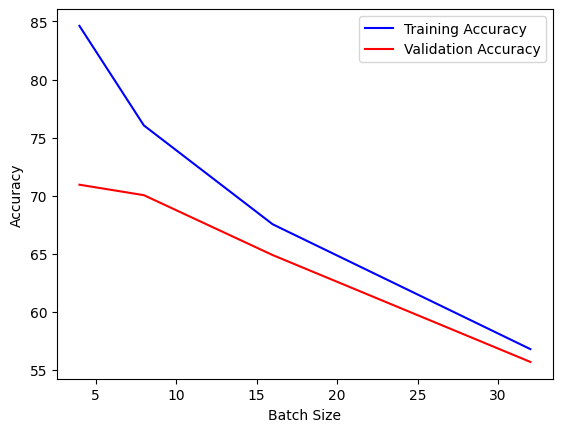

In [ ]:
def drawBS(x,y,z):
  plt.plot(x,y,color='blue',label = 'Training Accuracy') # for training data 
  plt.plot(x,z,color='red',label= 'Validation Accuracy') # for test data 
  plt.legend() 
  plt.xlabel("Batch Size") 
  plt.ylabel("Accuracy")
  plt.show()

BatchSize = [4,8,16,32]
ValAcc = []
TrainAcc = []
for i in range(len(BatchSize)):
  batchSize = BatchSize[i]
  print("=====================================")
  print("---------( "+"Batch Size = "+str(batchSize)+" )----------")
  M = CNNModel(batchSize,10,0.001)
  M.loadData()
  M.train() 
  model = M.Model
  trainloader = M.trainloader
  valLoader = M.valLoader
 
  # drawAcc(M.AccTrain,M.AccVal,M.Epoch)[ -13,  134,  119,  100, 57],[ -13,  134,  119,  100, 57],
  accT = Accuracy(trainloader,model)
  accV = Accuracy(valLoader,model)
  ValAcc.append(accV)
  TrainAcc.append(accT)

drawBS(BatchSize,TrainAcc,ValAcc)

## Reason of this behaviour...

Both training as well as test accuracy decrease with increase in batch size. This is because in most implementations the loss and hence the gradient is averaged over the batch. This means for a fixed number of training epochs, larger batch sizes take fewer steps. and learnig staps are low for higher batch size. That's why Accuracy decrease with increase in batch size.